In [46]:
import time
import datetime
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.gridspec as mpl_gs
import matplotlib.cm as cm
import matplotlib.dates as mdates
from matplotlib import rcParams
rcParams.update({'font.size': 16,'lines.linewidth':2})

from siriuspy.clientarch import ClientArchiver

In [47]:
client = ClientArchiver()
client.login('fernando.sa', 'boo500mev')

urllib3 InsecureRequestWarning disabled!


True

In [48]:
ini_time = datetime.datetime(2020, 2, 14, 18, 45, 0)
end_time = datetime.datetime(2020, 2, 14, 21, 53, 0)
strini = ini_time.isoformat() + '-03:00'
strend = end_time.isoformat() + '-03:00'
sp_data = dict()
rb_data = dict()
ref_data = dict()
skews = ['SI-03C1:PS-QS', 'SI-04C1:PS-QS', 'SI-05C1:PS-QS', 'SI-06C1:PS-QS', ]
for name in skews:
    time, data, *_ = client.getData(name+':Current-SP', strini, strend)
    sp_data[name] = {'x': time, 'y': data}
    time, data, *_ = client.getData(name+':PwrState-Sts', strini, strend)
    rb_data[name] = {'x': time, 'y': data}
    time, data, *_ = client.getData(name+':Current-Mon', strini, strend)
    ref_data[name] = {'x': time, 'y': data}

<IPython.core.display.Javascript object>


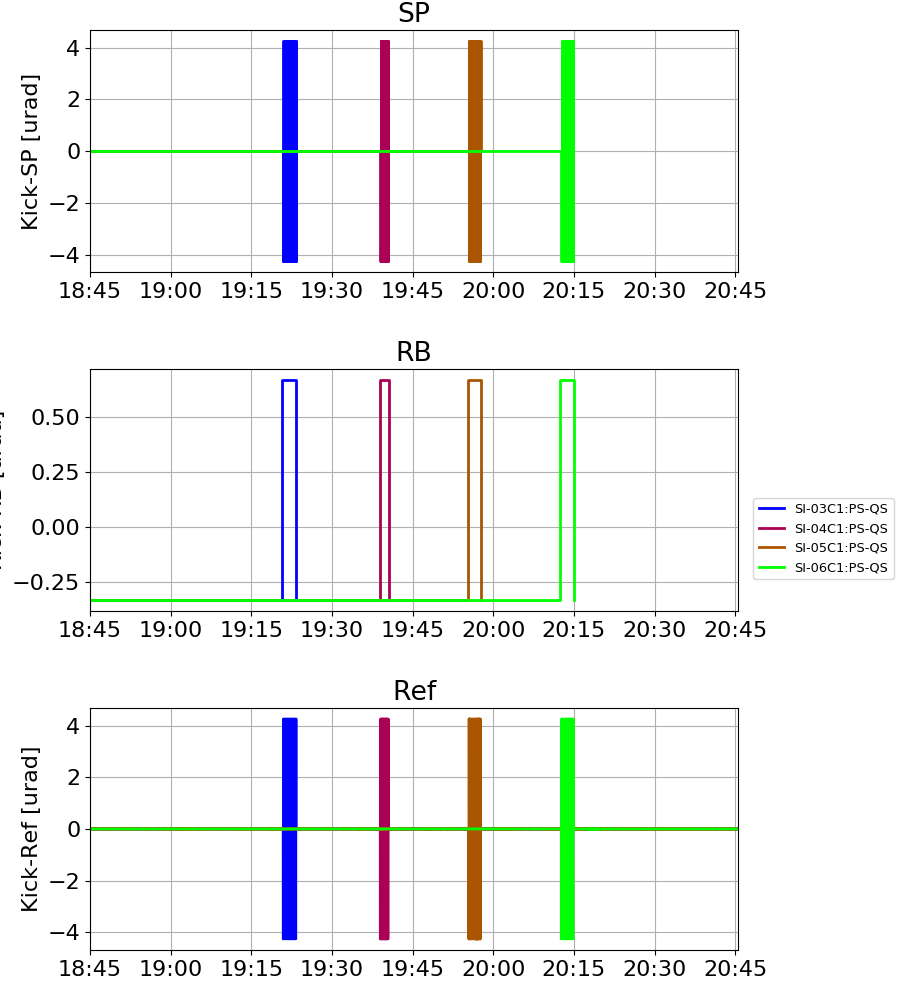

In [49]:
f  = plt.figure(figsize=(9, 10))
# f.autofmt_xdate()
gs = mpl_gs.GridSpec(3, 1)
gs.update(left=0.10, right=0.82, top=0.97, bottom=0.05, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax3 = plt.subplot(gs[2, 0], sharex=ax1)

ini = datetime.datetime(2020, 2, 14, 18, 45, 0)
dlt = datetime.timedelta(minutes=120.5)
myFmt = mdates.DateFormatter('%H:%M')

infos = [
    {'title': 'SP', 'ylabel': 'Kick-SP [urad]'},
    {'title': 'RB', 'ylabel': 'Kick-RB [urad]'},
    {'title': 'Ref', 'ylabel': 'Kick-Ref [urad]'}, ]
datas = [sp_data, rb_data, ref_data]
# datas = [sp_data, ref_data]
axs = [ax1, ax2, ax3]
# axs = [ax1, ax3]

indcs = np.linspace(0, 1, len(sp_data))
cmap = cm.brg(indcs)
for ax, dta, info in zip(axs, datas, infos):
    for i, k in enumerate(sorted(dta)):
        x = [datetime.datetime.fromtimestamp(i) for i in dta[k]['x']]
        y = np.array(dta[k]['y'])
        ax.step(x, y-y.mean(), where='post', color=cmap[i])
    ax.set_title(info['title'])
    ax.xaxis.set_major_formatter(myFmt)
    ax.grid(True)
    ax.set_xlim([ini, ini+dlt])
#     ax.set_xlabel('')
    ax.set_ylabel(info['ylabel'])
ax3.legend(sorted(sp_data), bbox_to_anchor=(1.25, 1.7), loc='center right', ncol=1, fontsize='xx-small')
f.show()